<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Tyler Lericos**  

## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [4]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [10]:
# Load banknote authentication dataset
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430/MLA4_TEL/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

<ipython-input-23-05604eb924f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['variance'])
<ipython-input-23-05604eb924f9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['forgery']==1]['variance'])


<Axes: xlabel='variance', ylabel='Density'>

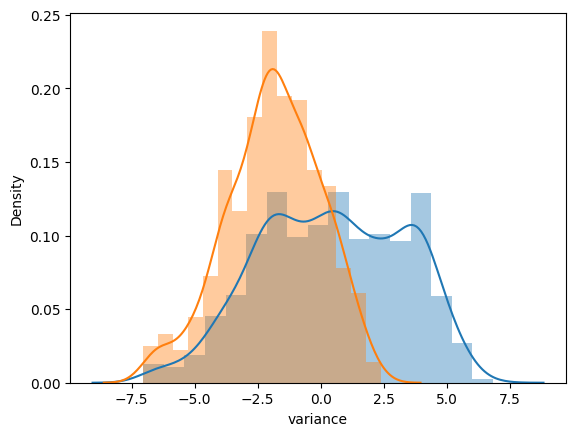

In [23]:
# Visualization with DistPlot
sns.distplot(df['variance'])
# Distribution plot with Forgery
sns.distplot(df[df['forgery']==1]['variance'])

### Splitting Data into Train/Test

In [11]:
# Create inputs (X) and target (y)
X = df.drop(columns=['forgery'])
y = df['forgery']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Pipeline

In [12]:
# MinMax scale all numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X.columns)
    ]
)

In [13]:
# Create pipeline with preprocessor and DecisionTreeClassifier
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [14]:
# Fit the classifier model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Executing the Model

In [18]:
# Execute the model
y_pred = clf_pipeline.predict(X_test)

In [19]:
# Predict on test set
y_pred = clf_pipeline.predict(X_test)

# Calculate and display evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.9606299212598425
F1 Score: 0.9799196787148594


### Evaluating Model

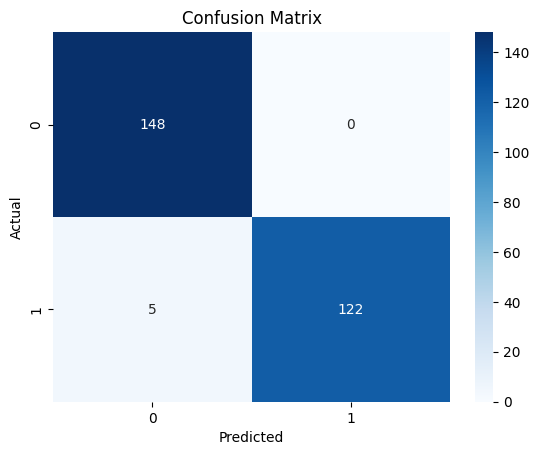

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Conclusion
This model worked very effectively in discerning the difference between forgery and no forgery. It also definitely portays the difference between forgery and variance show a widely positive correlation.

## Problem 2

### Reading the Data

In [28]:
# Load steel industry data
df_steel = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430/MLA4_TEL/Steel_industry_data.csv')

# Print the current column names to identify all columns
print(df_steel.columns)

# Rename columns based on the provided table
df_steel.columns = ['date', 'usage_kwh', 'temp_C', 'humidity', 'day_of_week', 'load_type', 'column7', 'column8', 'column9', 'column10', 'column11']

df_steel = df_steel[['date', 'usage_kwh', 'temp_C', 'humidity', 'day_of_week', 'load_type']]


# Print the current column names to identify all columns, after fix
print(df_steel.columns)


Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')
Index(['date', 'usage_kwh', 'temp_C', 'humidity', 'day_of_week', 'load_type'], dtype='object')


### Splitting Data into Train/Test

In [29]:
# Define X and y
X = df_steel.drop(columns=['date', 'usage_kwh'])
y = df_steel['usage_kwh']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Pipeline

In [35]:
# Apply OneHotEncoding to categorical variables and MinMax scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['temp_C', 'humidity']),
        # Only include categorical features for OneHotEncoder
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['day_of_week', 'load_type'])
    ]
)

In [36]:
# Create pipeline with preprocessor and DecisionTreeRegressor
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

### Executing the Model

In [37]:
# Fit the regression model
reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['temp_C', 'humidity']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week',
                                                   'load_type'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

### Evaluating Model

In [38]:
# Predict on test set
y_pred = reg_pipeline.predict(X_test)

# Calculate RMSE for train and test sets
train_rmse = mean_squared_error(y_train, reg_pipeline.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 0.5070810186931963
Test RMSE: 4.4393964637809775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Conclusion
The model did a pretty decent job with predictions and training, which is why the results are pretty okay. I did have some trouble getting things to work since some of these packages are depreicated but otherwise the model showing output of energy worked pretty well.